In [1]:
# Importação das bibliotecas necessárias
import pandas as pd  # Para manipulação de dados
from sklearn.model_selection import train_test_split  # Para separar dados em treino e teste
from sklearn.neighbors import KNeighborsRegressor  # Para o modelo KNN de regressão
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Métricas de regressão
import matplotlib.pyplot as plt  # Para plots opcionais de análise

In [2]:
# Passo 1: Carregar o dataset
# O arquivo CSV deve estar na mesma pasta que este notebook
df = pd.read_csv('dataset_educacao_graduacao_brasil_500.csv')

# Passo 2: Pré-processamento dos dados
# Limpar e converter colunas numéricas
df['Renda_Familiar_SM'] = df['Renda_Familiar_SM'].astype(str).str.replace(',', '.').astype(float)
df['CRA'] = df['CRA'].astype(str).str.replace(',', '.').astype(float)
df['Nota_ENEM'] = df['Nota_ENEM'].astype(float)
df['Horas_Estudo_Semanais'] = df['Horas_Estudo_Semanais'].astype(float)

# Criar variável binária para bolsistas
df['Tem_Bolsa'] = df['Bolsa_ou_Financiamento'].apply(lambda x: 1 if x in ['Prouni', 'FIES', 'Bolsa Institucional'] else 0)

# Selecionar features e target
features = ['Renda_Familiar_SM', 'Nota_ENEM', 'Horas_Estudo_Semanais']
X = df[features]
y = df['CRA']

In [3]:
# Passo 3: Separar dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Treinar e avaliar o modelo KNN para regressão
ks = [3, 5, 7, 10]  # Valores de K a testar
results = {}  # Dicionário para armazenar métricas

for k in ks:
    # Criar e treinar o modelo KNN
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    # Prever no conjunto de teste
    y_pred = knn.predict(X_test)
    
    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Armazenar resultados
    results[k] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    
    # Imprimir métricas
    print(f"\nResultados para K={k}:")
    print(f"MAE: {mae:.2f} (Erro médio absoluto)")
    print(f"MSE: {mse:.2f} (Erro quadrático médio)")
    print(f"R²: {r2:.2f} (Coeficiente de determinação)")


Resultados para K=3:
MAE: 1.06 (Erro médio absoluto)
MSE: 1.72 (Erro quadrático médio)
R²: -0.44 (Coeficiente de determinação)

Resultados para K=5:
MAE: 0.97 (Erro médio absoluto)
MSE: 1.48 (Erro quadrático médio)
R²: -0.24 (Coeficiente de determinação)

Resultados para K=7:
MAE: 0.89 (Erro médio absoluto)
MSE: 1.22 (Erro quadrático médio)
R²: -0.03 (Coeficiente de determinação)

Resultados para K=10:
MAE: 0.88 (Erro médio absoluto)
MSE: 1.19 (Erro quadrático médio)
R²: 0.00 (Coeficiente de determinação)


In [4]:
# Passo 5.1: Comparar CRA médio entre bolsistas e não bolsistas
bolsistas = df[df['Tem_Bolsa'] == 1]
nao_bolsistas = df[df['Tem_Bolsa'] == 0]

print("\nAnálise por subconjuntos (Hipótese: Bolsistas têm CRA semelhante ou superior):")
print(f"CRA médio bolsistas: {bolsistas['CRA'].mean():.2f}")
print(f"CRA médio não bolsistas: {nao_bolsistas['CRA'].mean():.2f}")

# KNN para bolsistas
X_bols = bolsistas[features]
y_bols = bolsistas['CRA']
if len(X_bols) > 0:
    X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_bols, y_bols, test_size=0.2, random_state=42)
    knn_b = KNeighborsRegressor(n_neighbors=5)
    knn_b.fit(X_b_train, y_b_train)
    y_b_pred = knn_b.predict(X_b_test)
    print(f"\nMétricas KNN para bolsistas (R²: {r2_score(y_b_test, y_b_pred):.2f})")

# KNN para não bolsistas
X_nao = nao_bolsistas[features]
y_nao = nao_bolsistas['CRA']
if len(X_nao) > 0:
    X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_nao, y_nao, test_size=0.2, random_state=42)
    knn_n = KNeighborsRegressor(n_neighbors=5)
    knn_n.fit(X_n_train, y_n_train)
    y_n_pred = knn_n.predict(X_n_test)
    print(f"Métricas KNN para não bolsistas (R²: {r2_score(y_n_test, y_n_pred):.2f})")


Análise por subconjuntos (Hipótese: Bolsistas têm CRA semelhante ou superior):
CRA médio bolsistas: 6.31
CRA médio não bolsistas: 6.18

Métricas KNN para bolsistas (R²: -0.17)
Métricas KNN para não bolsistas (R²: -0.12)


In [5]:
# Passo 5.2: Análise por Tipo_IES
publicas = df[df['Tipo_IES'] == 'Pública']
privadas = df[df['Tipo_IES'] == 'Privada']

print("\nAnálise por Tipo_IES:")
print(f"CRA médio em Públicas: {publicas['CRA'].mean():.2f} (Bolsistas: {publicas[publicas['Tem_Bolsa']==1]['CRA'].mean():.2f})")
print(f"CRA médio em Privadas: {privadas['CRA'].mean():.2f} (Bolsistas: {privadas[privadas['Tem_Bolsa']==1]['CRA'].mean():.2f})")

# KNN para Públicas
X_pub = publicas[features]
y_pub = publicas['CRA']
if len(X_pub) > 0:
    X_pub_train, X_pub_test, y_pub_train, y_pub_test = train_test_split(X_pub, y_pub, test_size=0.2, random_state=42)
    knn_pub = KNeighborsRegressor(n_neighbors=5)
    knn_pub.fit(X_pub_train, y_pub_train)
    y_pub_pred = knn_pub.predict(X_pub_test)
    print(f"Métricas KNN para Públicas (R²: {r2_score(y_pub_test, y_pub_pred):.2f})")

# KNN para Privadas
X_priv = privadas[features]
y_priv = privadas['CRA']
if len(X_priv) > 0:
    X_priv_train, X_priv_test, y_priv_train, y_priv_test = train_test_split(X_priv, y_priv, test_size=0.2, random_state=42)
    knn_priv = KNeighborsRegressor(n_neighbors=5)
    knn_priv.fit(X_priv_train, y_priv_train)
    y_priv_pred = knn_priv.predict(X_priv_test)
    print(f"Métricas KNN para Privadas (R²: {r2_score(y_priv_test, y_priv_pred):.2f})")


Análise por Tipo_IES:
CRA médio em Públicas: 6.18 (Bolsistas: 6.33)
CRA médio em Privadas: 6.25 (Bolsistas: 6.30)
Métricas KNN para Públicas (R²: -0.05)
Métricas KNN para Privadas (R²: -0.08)


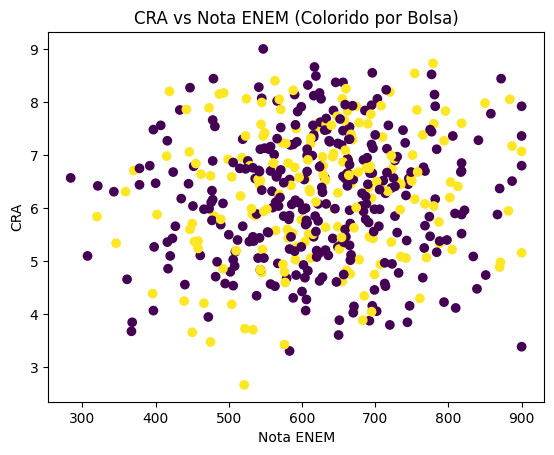

In [6]:
# Passo 6: Plotar dispersão para visualização
plt.scatter(df['Nota_ENEM'], df['CRA'], c=df['Tem_Bolsa'], cmap='viridis')
plt.xlabel('Nota ENEM')
plt.ylabel('CRA')
plt.title('CRA vs Nota ENEM (Colorido por Bolsa)')
plt.show()